In [ ]:
import pandas as EPandas
Early_Diabet = 'diabetes_prediction_dataset.csv'

Early_Prediction = EPandas.read_csv(Early_Diabet)
Early_Prediction

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
Early_Prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
Early_Prediction.select_dtypes(include=['object']).columns

Index(['gender', 'smoking_history'], dtype='object')

Diabetic Categories of Original Data:
 diabetes
0    91500
1     8500
Name: count, dtype: int64


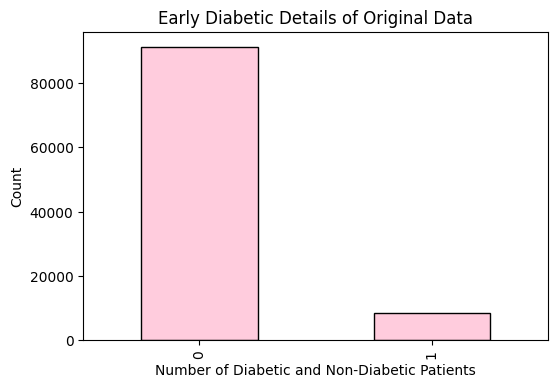

In [ ]:
import seaborn as EarlySborn
import matplotlib.pyplot as EarlyPlot

print("Diabetic Categories of Original Data:\n",Early_Prediction['diabetes'].value_counts())

EarlyPlot.figure(figsize=(6, 4))
Early_Prediction['diabetes'].value_counts().plot(kind='bar', color='#ffccdd', edgecolor='black')
EarlyPlot.title('Early Diabetic Details of Original Data')
EarlyPlot.xlabel('Number of Diabetic and Non-Diabetic Patients')
EarlyPlot.ylabel('Count')
EarlyPlot.show()

0 represents Non-Diabetic and 1 represents Early Diabetic.

In [ ]:
Early_Prediction.shape

(100000, 9)

In [ ]:
del Early_Prediction['gender']    ### Deleted unwanted feature from the data frame
Early_Prediction.isnull().values.sum()  #### Find the Null from Diabetic data

0

In [ ]:
print("Total Duplicates of Early Diabetics Data: ",Early_Prediction.duplicated().sum())
Early_Prediction = Early_Prediction.drop_duplicates()
print("Early Diabetic Data shape after deleted the duplicates: ",Early_Prediction.shape)

Total Duplicates of Early Diabetics Data:  6389
Early Diabetic Data shape after deleted the duplicates:  (93611, 8)


Diabetic Categories of Processed Data:
 diabetes
0    85141
1     8470
Name: count, dtype: int64


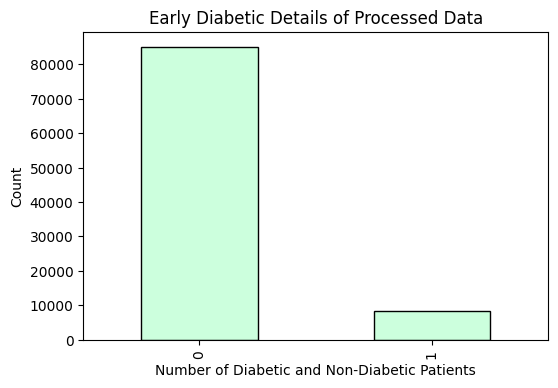

In [ ]:
print("Diabetic Categories of Processed Data:\n",Early_Prediction['diabetes'].value_counts())

EarlyPlot.figure(figsize=(6, 4))
Early_Prediction['diabetes'].value_counts().plot(kind='bar', color='#ccffdd', edgecolor='black')
EarlyPlot.title('Early Diabetic Details of Processed Data')
EarlyPlot.xlabel('Number of Diabetic and Non-Diabetic Patients')
EarlyPlot.ylabel('Count')
EarlyPlot.show()

Text(0.5, 1.0, 'Distribution of BMI')

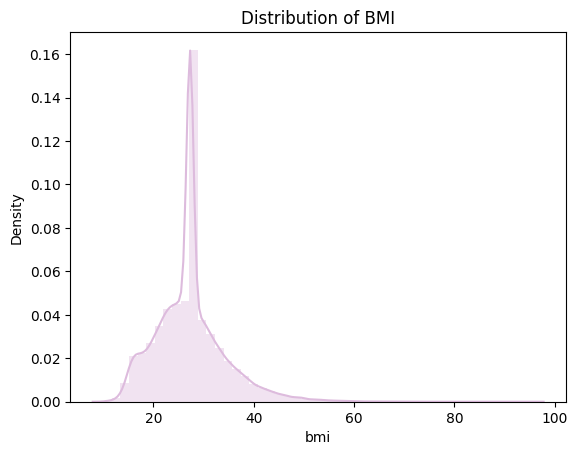

In [ ]:
import warnings as wr_EarlyDiabet
wr_EarlyDiabet.filterwarnings("ignore")

EarlySborn.distplot(Early_Prediction['bmi'], color ='#ddbbdd')
EarlyPlot.title('Distribution of BMI')

There is a sharp peak about a BMI of around 30, which means the majority of records in the dataset fall or fall within an approximate value close to it.

In [ ]:
from sklearn import preprocessing as EarlyProcess
from collections import Counter as CNT_EarlyDiabet
from imblearn.over_sampling import SMOTE as SMT_EarlyDiabet

Early_ObNum = EarlyProcess.LabelEncoder()
Early_Prediction['smoking_history']= Early_ObNum.fit_transform(Early_Prediction['smoking_history'])

X_EarlyDiabet = Early_Prediction.drop('diabetes',axis=1)
y_EarlyDiabet = Early_Prediction['diabetes']

print('Labels of Early Diabetic  %s' % CNT_EarlyDiabet(y_EarlyDiabet))
Mdl_EarlyDiabet = SMT_EarlyDiabet()
X_EarlyDiabet, y_EarlyDiabet = Mdl_EarlyDiabet.fit_resample(X_EarlyDiabet, y_EarlyDiabet)
print('Balanced Labels of Early Diabetic %s' % CNT_EarlyDiabet(y_EarlyDiabet))
Early_Prediction = EPandas.concat([X_EarlyDiabet, y_EarlyDiabet], axis=1)

print("\nEarly Diabetic Data Shape after Balancing: ",Early_Prediction.shape)
Early_Prediction['diabetes'].value_counts()

Labels of Early Diabetic  Counter({0: 85141, 1: 8470})
Balanced Labels of Early Diabetic Counter({0: 85141, 1: 85141})

Early Diabetic Data Shape after Balancing:  (170282, 8)


,count
diabetes,
0,85141
1,85141


In [ ]:
Early_Prediction.to_csv('EarlyPredictions_Diabetic.csv', index=False)
Early_Prediction.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,4,25.19,6.6,140,0
1,54.0,0,0,0,27.32,6.6,80,0
2,28.0,0,0,4,27.32,5.7,158,0
3,36.0,0,0,1,23.45,5.0,155,0
4,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
Early_Prediction.tail()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
170277,75.000000,0,0,3,25.658157,7.286903,280,1
170278,64.564929,0,0,4,39.150721,7.895450,240,1
170279,43.716761,0,0,0,45.907111,5.800000,157,1
170280,56.870281,0,0,4,30.369313,6.548112,145,1
170281,80.000000,0,0,5,30.050676,6.487117,240,1


In [ ]:
Early_Prediction.shape

(170282, 8)